# Problem 1

In [ ]:
#a)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(33)

X = np.random.randn(100) #order 1
eps = np.random.randn(100)
Y = X - 2*X**2 + eps

**a)** n = 100 observations, p = 2 predictors.
For x ~ N(0,1) and eps ~ N(0,1), y = x - 2x^2 + eps.

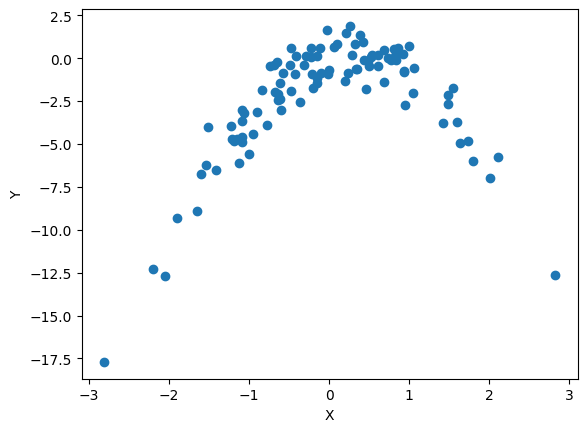

In [ ]:
#b)

fig, ax = plt.subplots()
ax.scatter(X, Y)

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

In [ ]:
#c)

from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

def LOOCV(X):
  X_2 = np.vstack((X, X**2)) #order 2
  X_3 = np.vstack((X_2, X**3)) #order 3
  X_4 = np.vstack((X_3, X**4)) #order 4

  loo = LeaveOneOut()
  lr = LinearRegression()

  i=0 #just for readability in the later printing statement
  for x in [X, X_2, X_3, X_4]:

    x = x.reshape(100, -1)

    MSE_arr = []

    for train, test in loo.split(x):
      x_train, x_test = x[train], x[test]
      Y_train, Y_test = Y[train], Y[test]

      lr.fit(x_train, Y_train)
      Y_hat = lr.predict(x_test)
      MSE_arr.append((Y_test - Y_hat)**2)

    i+=1
    print(f'order {i} polynomial LOOCV MSE: {np.mean(MSE_arr)}')
    print(f'coefs: {lr.coef_}, intercept: {lr.intercept_}')
    print()

LOOCV(X)

order 1 polynomial LOOCV MSE: 10.945870899175556
coefs: [1.17176131], intercept: -2.281492671351752

order 2 polynomial LOOCV MSE: 11.730548219772432
coefs: [0.15092979 0.17506698], intercept: -2.491581222189068

order 3 polynomial LOOCV MSE: 11.828021488578583
coefs: [-0.13235879  0.05719828  0.16575802], intercept: -2.3000135647984545

order 4 polynomial LOOCV MSE: 12.435892489586314
coefs: [-0.09291019  0.248697    0.0538763   0.00228087], intercept: -2.4433547829010167



In [ ]:
#d)

np.random.seed(50)

X = np.random.randn(100)

LOOCV(X)

order 1 polynomial LOOCV MSE: 11.695772250611443
coefs: [0.31218848], intercept: -2.351738045220852

order 2 polynomial LOOCV MSE: 12.49940623781868
coefs: [ 0.02282369 -0.01806326], intercept: -2.3405552607320517

order 3 polynomial LOOCV MSE: 13.145738835715406
coefs: [-0.04203886 -0.0058678  -0.25107625], intercept: -2.2231843078861195

order 4 polynomial LOOCV MSE: 13.266390246101896
coefs: [ 0.00810198  0.03358195 -0.55972793  0.00147571], intercept: -2.1781868800177815



**d)** The results were different results since the values drawn from the normal distribution were different.

**e)** In both seeds, i, or 1, performed better. This is surprising to me since the real function is a quadratic. The quadratic model one must have overfitted a little bit compared to the linear one.

**f)** the two coefficients of the quadratic model have about a tenth of as much influence each as the one coefficient in the linear model

# Problem 2

In [ ]:
import pandas as pd
import numpy as np

"""
just copy the path to the auto data set into here, but this should work ...
...I don't know where you have the auto data set saved in your computer is all.
"""
PATH = "/content/housing.csv"

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(PATH, delimiter=r"\s+", names=column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#a)

miu_hat = df['MEDV'].mean()
miu_hat

22.532806324110677

In [ ]:
#b)

from math import sqrt

std_err = df['MEDV'].std() / sqrt(len(df['MEDV']))
std_err

0.4088611474975351

**b)** The sample mean is likely a good estimate of the population mean since the standard error is low

In [ ]:
#c)

boot_means = np.zeros(10)

for i in range(10):
  bootstrap = np.random.choice(df['MEDV'], size=len(df['MEDV']), replace=True)
  boot_means[i] = bootstrap.mean()

std_err_mean_bts = boot_means.std()
std_err_mean_bts

0.4939137951016077

**c)** A higher than part b since I only used 10 bootstraps, when usually much larger magnitudes are used

In [ ]:
#d)

print(f'bootstrap confidence interval: ({miu_hat - 2*std_err_mean_bts}, {miu_hat + 2*std_err_mean_bts})')
print(f'confidence interval: ({miu_hat - 2*std_err}, {miu_hat + 2*std_err})')

bootstrap confidence interval: (21.544978733907463, 23.52063391431389)
confidence interval: (21.715084029115605, 23.35052861910575)


In [ ]:
#e)

miu_med = df['MEDV'].median()
miu_med

21.2

In [ ]:
#f)

boot_medians = np.zeros(10)

for i in range(10):
  bootstrap = np.random.choice(df['MEDV'], size=len(df['MEDV']), replace=True)
  boot_medians[i] = np.median(bootstrap)

std_err_medians_bts = boot_medians.std()
std_err_medians_bts

0.31685959035509653

**f)** much better than the standard error of the mean. Suggests that median is a better measure, here.

In [ ]:
#g)

tenth_percentile = np.percentile(df['MEDV'], 10)

print(f'tenth percentile of MEDV: {tenth_percentile}')

tenth percentile of MEDV: 12.75


In [ ]:
#f)

boot_tenth_percentile = np.zeros(10)

for i in range(10):
  bootstrap = np.random.choice(df['MEDV'], size=len(df['MEDV']), replace=True)
  boot_tenth_percentile[i] = np.percentile(bootstrap, 10)

std_err_tp_bts = boot_tenth_percentile.std()
std_err_tp_bts

0.48979587585033796

**f)** did nearly the same as std error of the mean

# Problem 3

In [ ]:
import pandas as pd
import numpy as np

"""
just copy the path to the auto data set into here, but this should work ...
...I don't know where you have the auto data set saved in your computer is all.
"""
PATH = "/content/Wage.csv"

df = pd.read_csv(PATH)

df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [ ]:
#a)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

X = df['age'].to_numpy() #order 1
X_2 = np.vstack((X, X**2)) #order 2
X_3 = np.vstack((X_2, X**3)) #order 3
X_4 = np.vstack((X_3, X**4)) #order 4

y = df['wage']

models = []
kf = KFold(n_splits=5)

i=0 #just for readability in the later printing statement
for x in [X, X_2, X_3, X_4]:

  x = x.reshape(len(X), -1)

  MSE_arr = []

  for train, test in kf.split(x):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]

    lr = LinearRegression()

    lr.fit(x_train, y_train)
    y_hat = lr.predict(x_test)
    MSE_arr.append((y_test - y_hat)**2)

    models.append(lr)

  i+=1
  print(f'order {i} polynomial KFCV MSE: {np.mean(MSE_arr)}')
  print()

order 1 polynomial KFCV MSE: 1675.0142380530042

order 2 polynomial KFCV MSE: 1742.537012796214

order 3 polynomial KFCV MSE: 1747.439559521757

order 4 polynomial KFCV MSE: 1761.0266026520376



**a)** looks like d = 1 had the smallest MSE out of degrees 1-4.

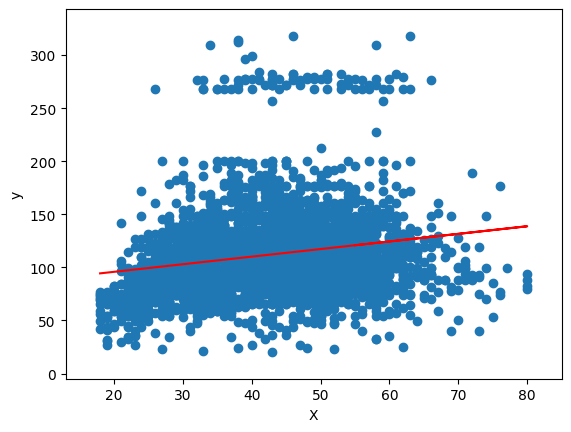

In [ ]:
#a)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

regr_line = models[0].intercept_ + models[0].coef_[0] * X

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, regr_line, 'r')

ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_xlim(X.min() - 5, X.max() + 5)
ax.set_ylim(y.min() - 25, y.max() + 25)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))

plt.show()

In [ ]:
#b)

from sklearn.preprocessing import KBinsDiscretizer

step_models = []

kf_step = KFold(n_splits=5)

i=1
for n_bins in range(2, 21):

  binner = KBinsDiscretizer(n_bins=n_bins, encode='onehot-dense', strategy='uniform')
  MSE_test_arr = []
  MSE_train_arr = []

  for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    X_train = np.array(X_train).reshape(-1,1)
    X_test = np.array(X_test).reshape(-1,1)

    X_train_binned = binner.fit_transform(X_train)
    X_test_binned = binner.transform(X_test)

    lr = LinearRegression()

    lr.fit(X_train_binned, y_train)
    y_hat = lr.predict(X_test_binned)
    y_hat_train = lr.predict(X_train_binned)
    MSE_test_arr.append(((y_test - y_hat)**2) / len(X_test_binned))
    MSE_train_arr.append(((y_train - y_hat_train)**2) / len(X_train_binned))

    step_models.append(lr)

  i+=1
  print(f'{i} steps KFCV test MSE: {np.mean(MSE_test_arr)}')
  print(f'{i} steps KFCV train MSE: {np.mean(MSE_train_arr)}')
  print()

2 steps KFCV test MSE: 2.884657279602565
2 steps KFCV train MSE: 0.7205242315015812

3 steps KFCV test MSE: 2.805606726932172
3 steps KFCV train MSE: 0.6995982824286765

4 steps KFCV test MSE: 2.7241740371188423
4 steps KFCV train MSE: 0.6799052650093931

5 steps KFCV test MSE: 2.72298402503746
5 steps KFCV train MSE: 0.677484447371554

6 steps KFCV test MSE: 2.709750810125087
6 steps KFCV train MSE: 0.6736209623295099

7 steps KFCV test MSE: 2.6887833387320357
7 steps KFCV train MSE: 0.668237566594919

8 steps KFCV test MSE: 2.6712637080906534
8 steps KFCV train MSE: 0.6636514777136119

9 steps KFCV test MSE: 2.68961632868498
9 steps KFCV train MSE: 0.66692035343097

10 steps KFCV test MSE: 2.6828827805770548
10 steps KFCV train MSE: 0.6642648724885406

11 steps KFCV test MSE: 2.6750128292338475
11 steps KFCV train MSE: 0.6615089166135043

12 steps KFCV test MSE: 2.6773864759090915
12 steps KFCV train MSE: 0.6623242964621573

13 steps KFCV test MSE: 2.669929503413377
13 steps KFCV tra

**b)** 8 steps appears to be a good value for the number cuts, since any more we risk overfitting, but the MSE is still among the lowest.

In [ ]:
print(step_models[30].intercept_)
step_models[30].coef_

-59182940301212.08


array([5.91829403e+13, 5.91829403e+13, 5.91829403e+13, 5.91829403e+13,
       5.91829403e+13, 5.91829403e+13, 5.91829403e+13, 5.91829403e+13])

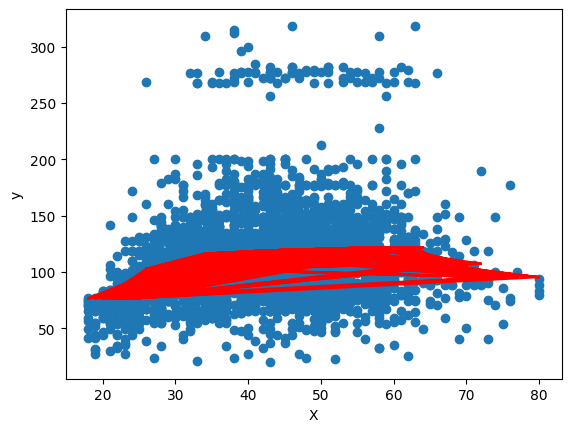

In [ ]:
#b)

binner = KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='uniform')
X_binned = binner.fit_transform(X.reshape(-1,1))
y_hat = step_models[30].predict(X_binned)

fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X, y_hat, 'r')

ax.set_xlabel('X')
ax.set_ylabel('y')

plt.show()

# Problem 4

In [ ]:
import pandas as pd
import numpy as np

"""
just copy the path to the auto data set into here, but this should work ...
...I don't know where you have the auto data set saved in your computer is all.
"""
PATH = "/content/housing.csv"

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(PATH, delimiter=r"\s+", names=column_names)

KFCV MSE: 0.004647367459422572


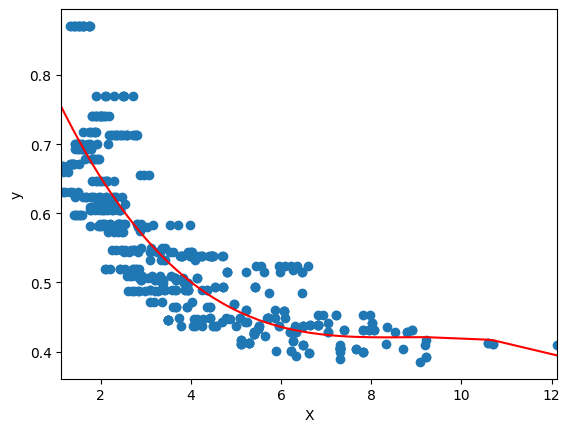

In [ ]:
#a)

from sklearn.preprocessing import PolynomialFeatures

X = np.array(df['DIS']).reshape(-1,1)
y = df['NOX']

MSEs = []
models = []

kf = KFold(n_splits=5)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

for train, test in kf.split(X_poly):

  X_train, X_test = X_poly[train], X_poly[test]
  y_train, y_test = y[train], y[test]

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  y_hat = lr.predict(X_test)
  MSEs.append(np.mean((y_test - y_hat)**2))
  models.append(lr)

print(f'KFCV MSE: {np.mean(MSEs)}')

idx = np.argsort(X[:, 0])
X_sorted = X[idx]
X_poly_sorted = X_poly[idx]
y_learned = models[0].predict(X_poly_sorted)

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X_sorted, y_learned, 'r')

ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_xlim(X.min(), X.max())

plt.show()

degree 1 polynomial KFCV mean RSS: 0.610058824146533


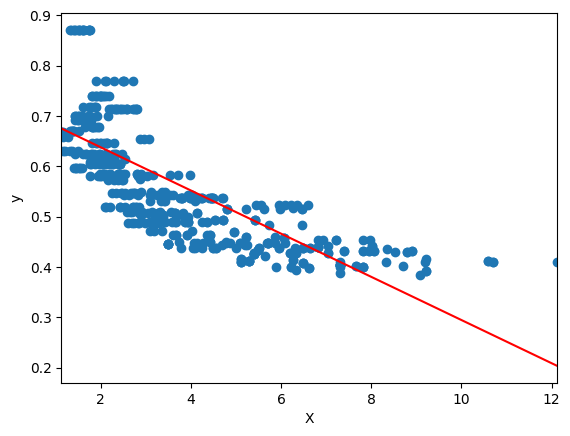

degree 2 polynomial KFCV mean RSS: 0.46211250981718177


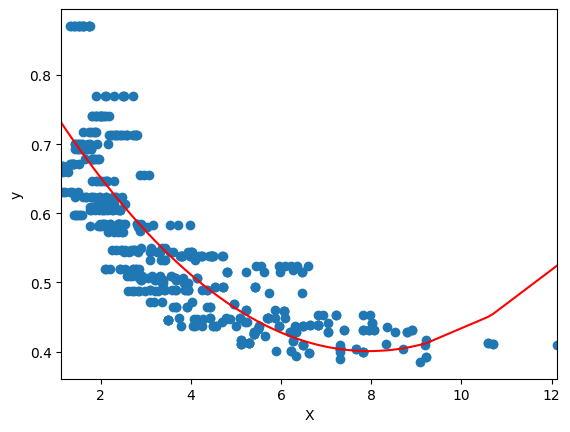

degree 3 polynomial KFCV mean RSS: 0.469809987833193


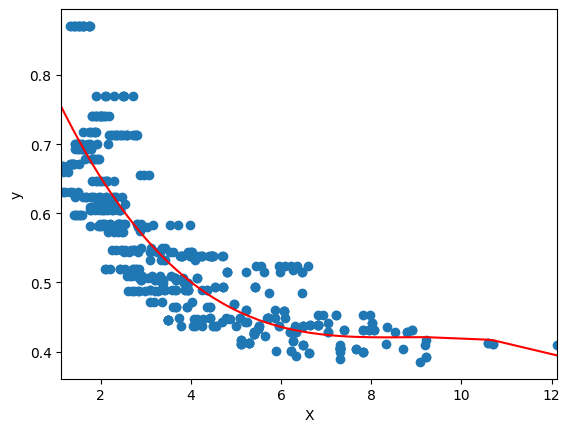

degree 4 polynomial KFCV mean RSS: 0.48079904305041693


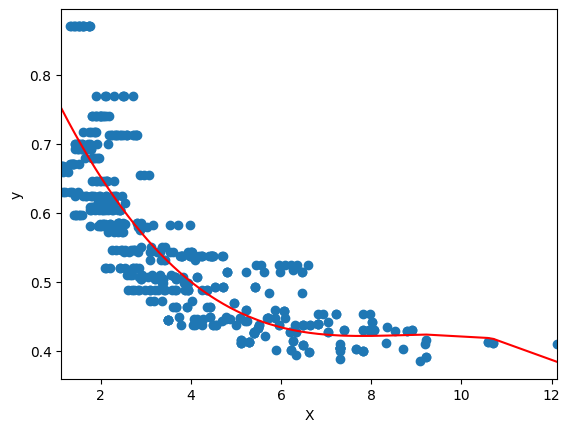

degree 5 polynomial KFCV mean RSS: 0.5023637003333218


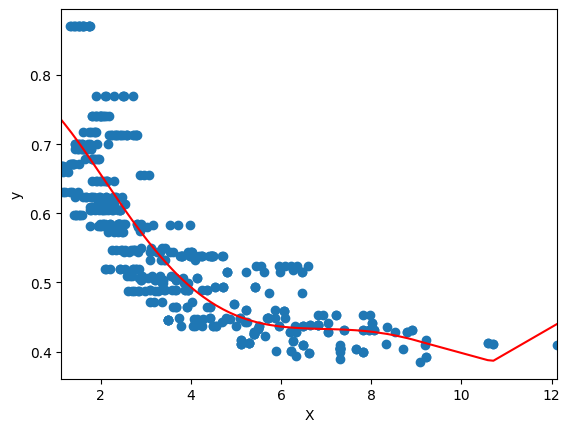

degree 6 polynomial KFCV mean RSS: 2.230820990827389


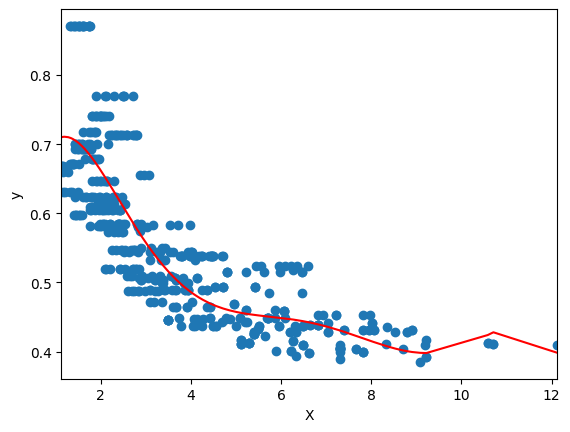

degree 7 polynomial KFCV mean RSS: 8.68750232184503


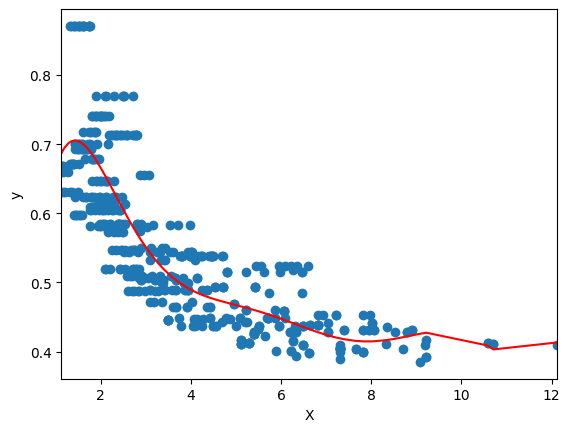

degree 8 polynomial KFCV mean RSS: 244.217804691604


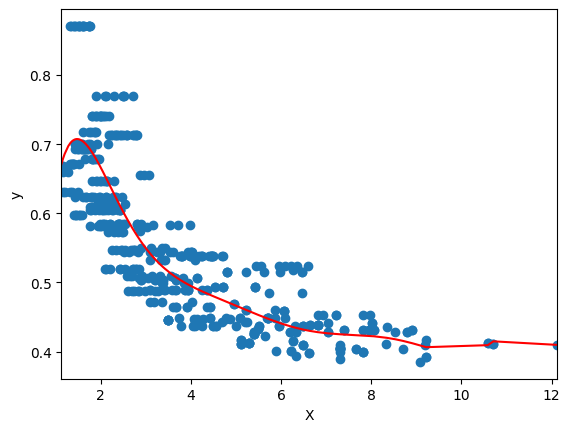

degree 9 polynomial KFCV mean RSS: 13.226250285081026


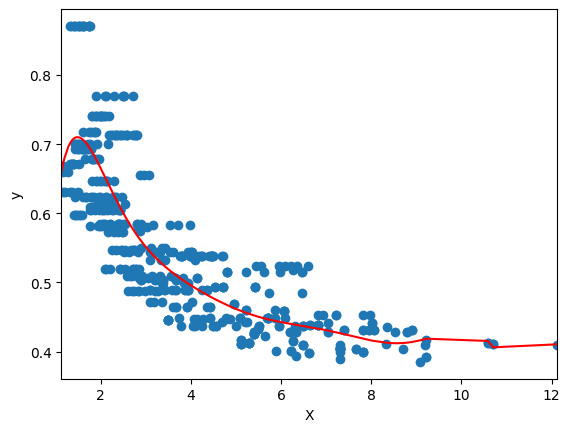

degree 10 polynomial KFCV mean RSS: 8549.507364077677


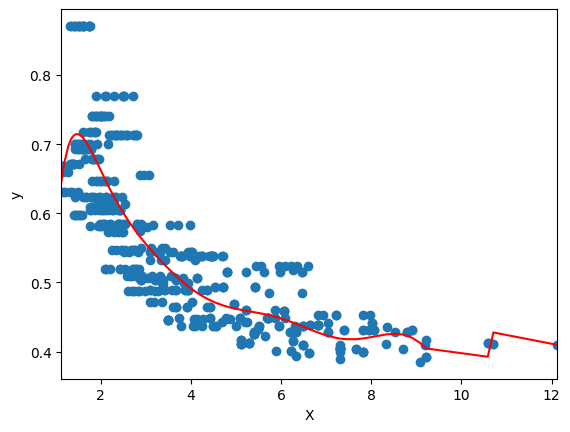

In [ ]:
#b, c)

for degree in range(1, 11):

  MSEs = []
  models = []

  kf = KFold(n_splits=5)
  poly = PolynomialFeatures(degree=degree)
  X_poly = poly.fit_transform(X)

  for train, test in kf.split(X_poly):

    X_train, X_test = X_poly[train], X_poly[test]
    y_train, y_test = y[train], y[test]

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_hat = lr.predict(X_test)
    MSEs.append(np.sum((y_test - y_hat)**2))
    models.append(lr)

  print(f'degree {degree} polynomial KFCV mean RSS: {np.mean(MSEs)}')

  idx = np.argsort(X[:, 0])
  X_sorted = X[idx]
  X_poly_sorted = X_poly[idx]
  y_learned = models[0].predict(X_poly_sorted)

  fig, ax = plt.subplots()
  ax.scatter(X, y)
  ax.plot(X_sorted, y_learned, 'r')

  ax.set_xlabel('X')
  ax.set_ylabel('y')

  ax.set_xlim(X.min(), X.max())

  plt.show()

**c)** degree 2 has the smallest RSS

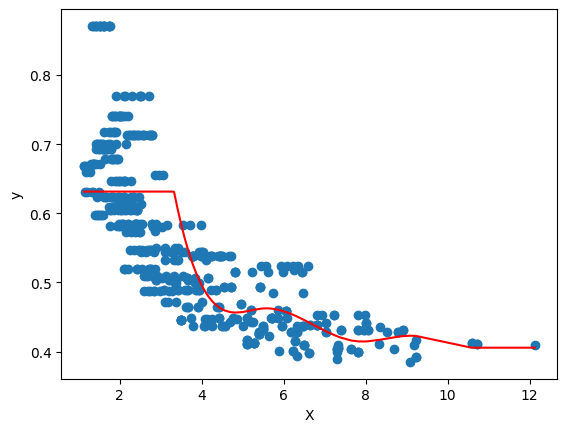

In [ ]:
#d)

from sklearn.preprocessing import SplineTransformer

n_knots = 4
knots = np.linspace(X.min(), X.max(), n_knots + 2)[1:-1]
spline_transformer = SplineTransformer(knots=knots.reshape(-1,1), degree=3, include_bias=False)
X_spline = spline_transformer.fit_transform(X)

lr = LinearRegression()
lr.fit(X_spline, y)

idx = np.argsort(X[:, 0])
X_sorted = X[idx]
X_spline_sorted = X_spline[idx]
y_hat = lr.predict(X_spline_sorted)

fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X_sorted, y_hat, 'r')

ax.set_xlabel('X')
ax.set_ylabel('y')

plt.show()

2 knots KFCV mean test RSS: 0.867361493681926
2 knots KFCV mean train RSS: 3.4694459747277038


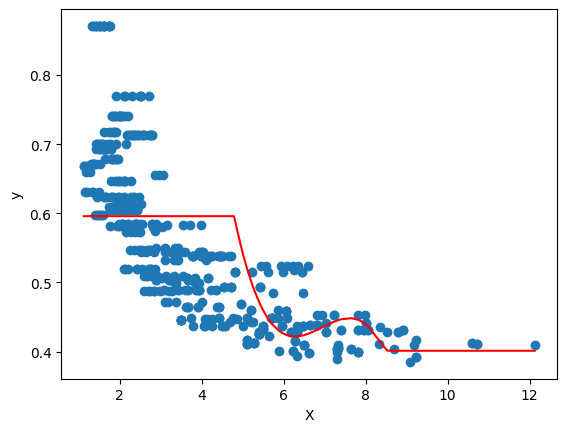

3 knots KFCV mean test RSS: 0.7115993301562984
3 knots KFCV mean train RSS: 2.846397320625194


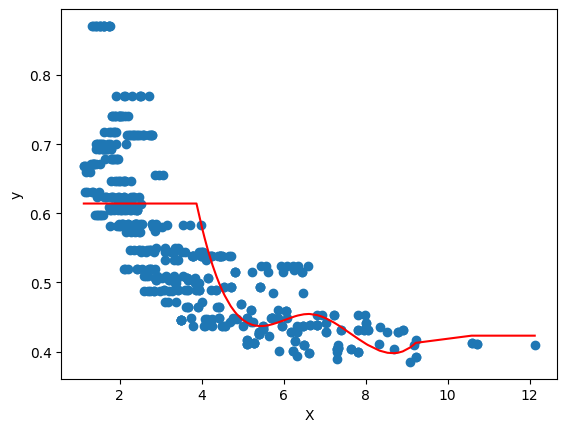

4 knots KFCV mean test RSS: 0.5931844762688365
4 knots KFCV mean train RSS: 2.3727379050753457


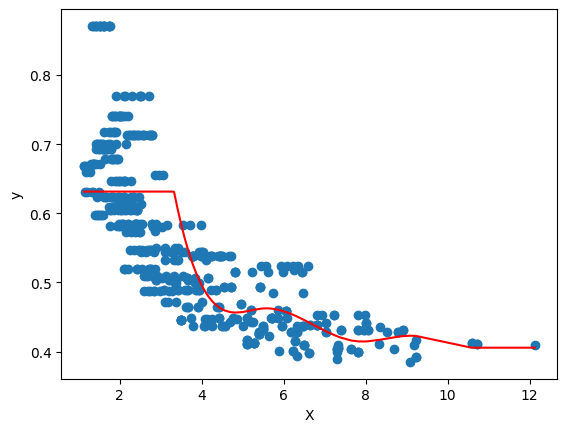

5 knots KFCV mean test RSS: 0.5027546078314149
5 knots KFCV mean train RSS: 2.0110184313256596


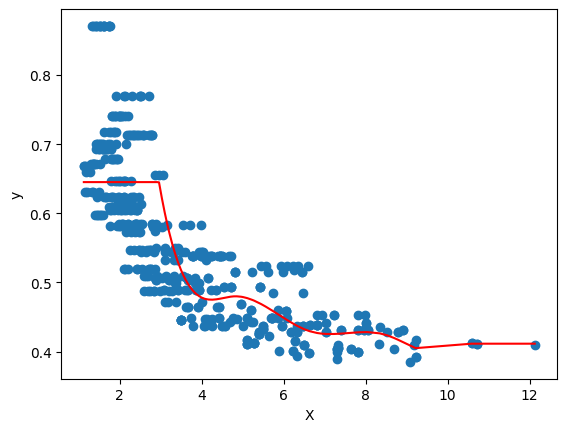

6 knots KFCV mean test RSS: 0.44440425283127877
6 knots KFCV mean train RSS: 1.7776170113251155


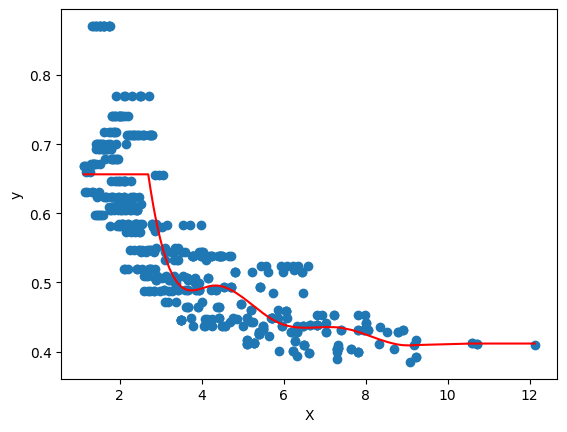

7 knots KFCV mean test RSS: 0.41196854447759373
7 knots KFCV mean train RSS: 1.647874177910375


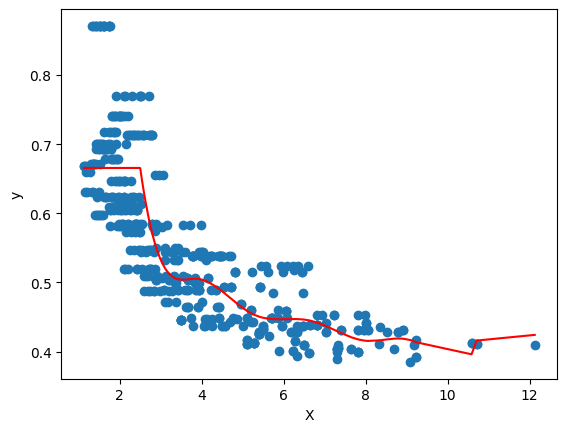

8 knots KFCV mean test RSS: 0.4020350791765253
8 knots KFCV mean train RSS: 1.6081403167061012


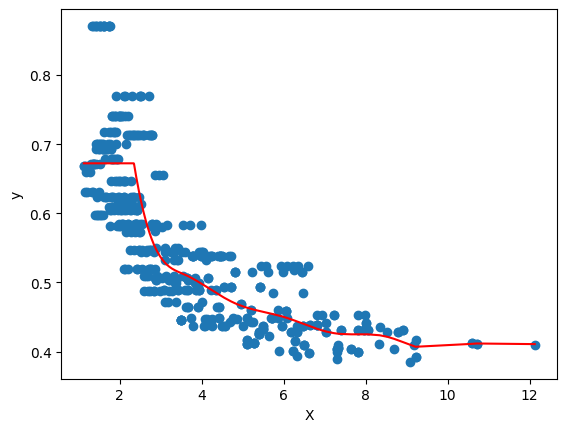

9 knots KFCV mean test RSS: 0.39213181788438745
9 knots KFCV mean train RSS: 1.5685272715375496


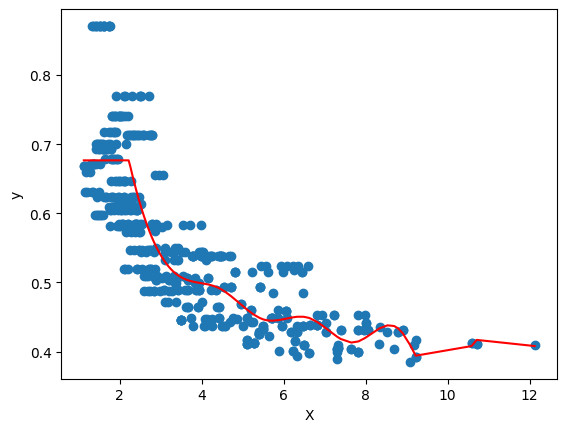

10 knots KFCV mean test RSS: 0.3864079171122018
10 knots KFCV mean train RSS: 1.5456316684488072


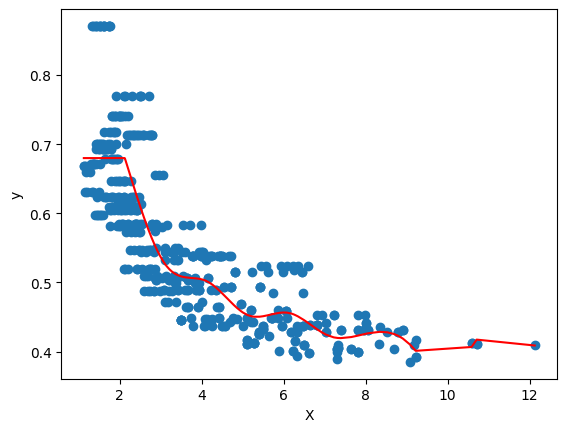

In [ ]:
#e, f)

for n_knots in range(2, 11):

  MSEs_test = []
  MSEs_train =[]
  models = []

  knots = np.linspace(X.min(), X.max(), n_knots + 2)[1:-1]
  spline_transformer = SplineTransformer(knots=knots.reshape(-1,1), degree=3, include_bias=False)
  X_spline = spline_transformer.fit_transform(X)

  kf = KFold(n_splits=5)

  for train, test in kf.split(X_spline):

    X_train, X_test = X_spline[train], X_spline[test]
    y_train, y_test = y[train], y[test]

    lr = LinearRegression()
    lr.fit(X_spline, y)

    y_hat = lr.predict(X_test)
    y_hat_train = lr.predict(X_train)
    MSEs_test.append(np.sum((y_test - y_hat)**2))
    MSEs_train.append(np.sum((y_train - y_hat_train)**2))
    models.append(lr)

  print(f'{n_knots} knots KFCV mean test RSS: {np.mean(MSEs_test)}')
  print(f'{n_knots} knots KFCV mean train RSS: {np.mean(MSEs_train)}')

  idx = np.argsort(X[:, 0])
  X_sorted = X[idx]
  X_spline_sorted = X_spline[idx]
  y_hat = models[0].predict(X_spline_sorted)

  fig, ax = plt.subplots()

  ax.scatter(X, y)
  ax.plot(X_sorted, y_hat, 'r')

  ax.set_xlabel('X')
  ax.set_ylabel('y')

  plt.show()

**f)** it looks like 10 knots worked the best. Actually, it looked like the more knots, the better.